<div align="center">
    <h1>Fingerprint blood group detection</h1>
</div>

#### **1. Importing the libs :**

In [144]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization
import tensorflow.keras.layers as tfl

#### **2. loading the data set Method 1:**

In [99]:
# define the resize shape :
image_height = 60
image_width = 60
batch_size = 32

In [3]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\hp\Downloads\data_finger\dataset_blood_group', # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42,
    validation_split = 0.4,
    subset = "training"
)

ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\hp\Downloads\data_finger\dataset_blood_group', # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42,
    validation_split = 0.4,
    subset = "validation"
)

Found 6000 files belonging to 8 classes.
Using 3600 files for training.
Found 6000 files belonging to 8 classes.
Using 2400 files for validation.


In [4]:
# devide the val data set into val and test data set 
val_batches = tf.data.experimental.cardinality(ds_val)
ds_test = ds_val.take(val_batches // 2)
ds_validation = ds_val.skip(val_batches // 2)

In [5]:
# displaying the shapes :
print('the number of batches in train set :', tf.data.experimental.cardinality(ds_train))
print('the number of batches in validation set :', tf.data.experimental.cardinality(ds_validation))
print('the number of batches in test set :', tf.data.experimental.cardinality(ds_test))

the number of batches in train set : tf.Tensor(113, shape=(), dtype=int64)
the number of batches in validation set : tf.Tensor(38, shape=(), dtype=int64)
the number of batches in test set : tf.Tensor(37, shape=(), dtype=int64)


In [6]:
# displaying the shapes of images:
for img, lab in ds_train.take(1):
    image = img[0]
    label = lab[0]
    print('the shape of the image :', image.shape)
    print('the label of the image :', label.shape)

the shape of the image : (40, 40, 3)
the label of the image : (8,)


In [7]:
# displaying the range of labeles :
print('the labels are :', ds_train.class_names)

the labels are : ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


#### **3. Data Batch visualization :**

In [8]:
# image visualisation :

# initialization of a dictionary that contient 10 images by class 
images_by_class = {}

for images, labels in ds_train :
    for image, label in zip(images, labels):
        label = tf.argmax(label).numpy()
        if label not in images_by_class:
            images_by_class[label] = []
        if len(images_by_class[label]) < 10 :
            images_by_class[label].append(image.numpy())

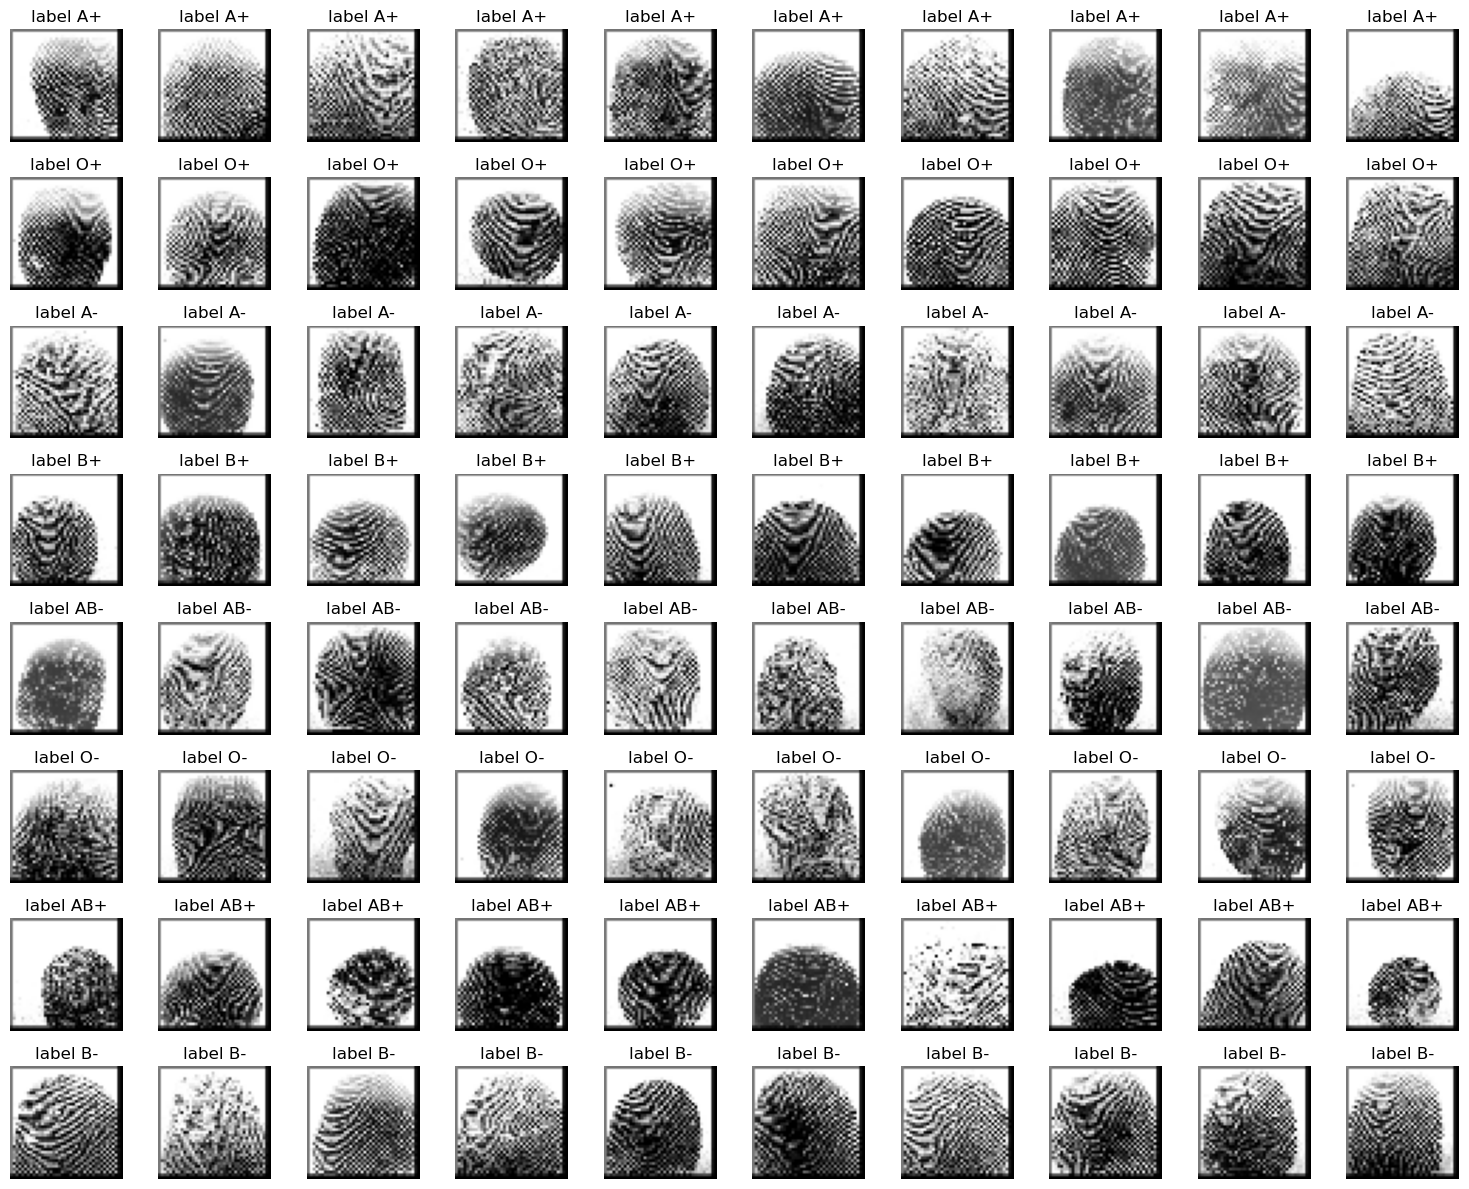

In [9]:
# create the visuals :
total_images = len(images_by_class) * 10 
cols = 10
rows = (total_images // cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
index = 0

for label, images in images_by_class.items():
    for image in images:
        ax = axes.flat[index]
        ax.imshow(image.astype("uint8"))
        ax.axis('off')
        ax.set_title(f"label {ds_train.class_names[label]}")
        index += 1

plt.tight_layout()
plt.show()

### **5. Data augmentaion :**

In [56]:
# define the function :
def augment_image(image, label):
    augmented_images = []
    augmented_labels = []

    # Miroir horizontal
    mirrored = tf.image.flip_left_right(image)
    augmented_images.append(mirrored)

    # Rotation 180 deg
    rotated_180 = tf.image.rot90(image, k = 2) 
    augmented_images.append(rotated_180)

    # Rotation 90 deg
    rotated_90 = tf.image.rot90(image, k = 1) 
    augmented_images.append(rotated_90)

    # Rotation 270
    rotated_270 = tf.image.rot90(image, k = 3) 
    augmented_images.append(rotated_270)

    augmented_labels.extend([label] * 4)
    return augmented_images, augmented_labels


In [90]:
# example : take one image:
for img, lab in ds_train.take(1):
    image = img[0]
    label = lab[0]
    break

In [91]:
# augment the data :
augmented_images, aug_label = augment_image(image, label)
aug_label

[<tf.Tensor: shape=(8,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

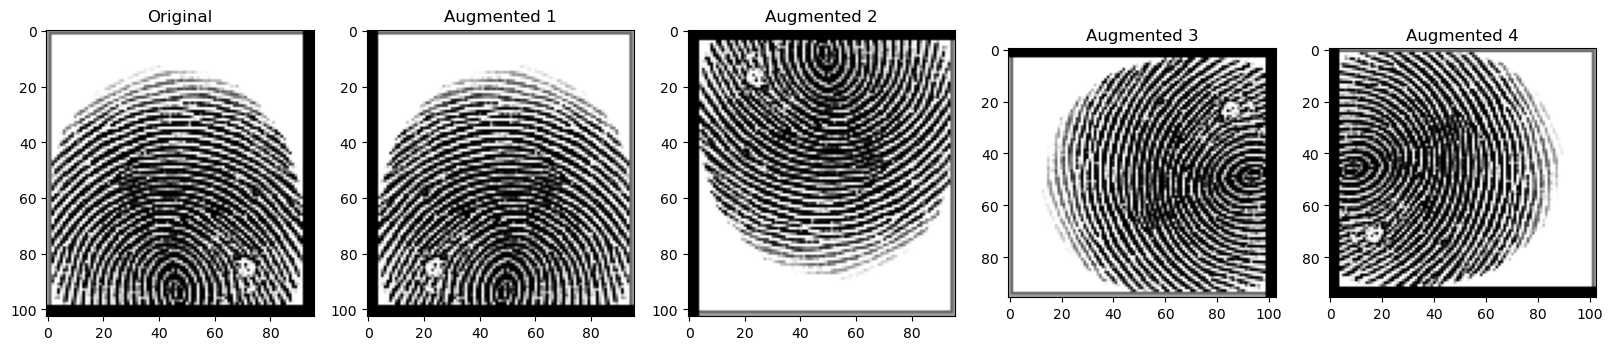

In [92]:
# visualization :
plt.figure(figsize=(20, 20))
plt.subplot(1, 5, 1)
image = tf.clip_by_value(image, 0, 255)  
image = tf.cast(image, tf.uint8)  
plt.imshow(image)
plt.title("Original")
for i, aug_img in enumerate(augmented_images):
    plt.subplot(1, 5, i + 2)
    image_clipped = tf.clip_by_value(aug_img, 0, 255)  
    image_clipped = tf.cast(image_clipped, tf.uint8)  
    plt.imshow(image_clipped)
    plt.title(f"Augmented {i+1}")
plt.show()

In [93]:
# Loading all data :
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\hp\Downloads\data_finger\dataset_blood_group',  
    labels="inferred",  
    label_mode="categorical",  
    image_size=(103, 96),
    shuffle=True,
    seed=42,
)
ds_train

Found 6000 files belonging to 8 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 103, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [94]:
# stock folder
augmented_images_dir = r'C:\Users\hp\Downloads\Augmented_data'

# create the labels folders
for label in ds_train.class_names:
    label_dir = os.path.join(augmented_images_dir, label)
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)
r = 0
for batch_images, batch_labels in ds_train:
    for i in range(batch_images.shape[0]): 
        image = batch_images[i]
        label = batch_labels[i]

        # apply the augmentation
        augmented_images, augmented_labels = augment_image(image, label)

        # Stock the augmented data 
        for j, augmented_image in enumerate(augmented_images):
            label_index = np.argmax(augmented_labels[j])  # one hit into index
            label_name = ds_train.class_names[label_index]  # the namee
            label_dir = os.path.join(augmented_images_dir, label_name)

            # stock
            img_path = os.path.join(label_dir, f"augmented_{r}.png")
            r = r + 1  
            tf.keras.preprocessing.image.save_img(img_path, augmented_image.numpy())


In [95]:
# load the data augmentaion :
ds_augmented = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\hp\Downloads\Augmented_data',  
    labels="inferred",  
    label_mode="categorical",  
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle=True,
    seed=42,
)
ds_augmented

Found 24000 files belonging to 8 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 40, 40, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [96]:
# image visualisation :

# initialization of a dictionary that contient 10 images by class 
images_by_class = {}

for images, labels in ds_augmented :
    for image, label in zip(images, labels):
        label = tf.argmax(label).numpy()
        if label not in images_by_class:
            images_by_class[label] = []
        if len(images_by_class[label]) < 10 :
            images_by_class[label].append(image.numpy())

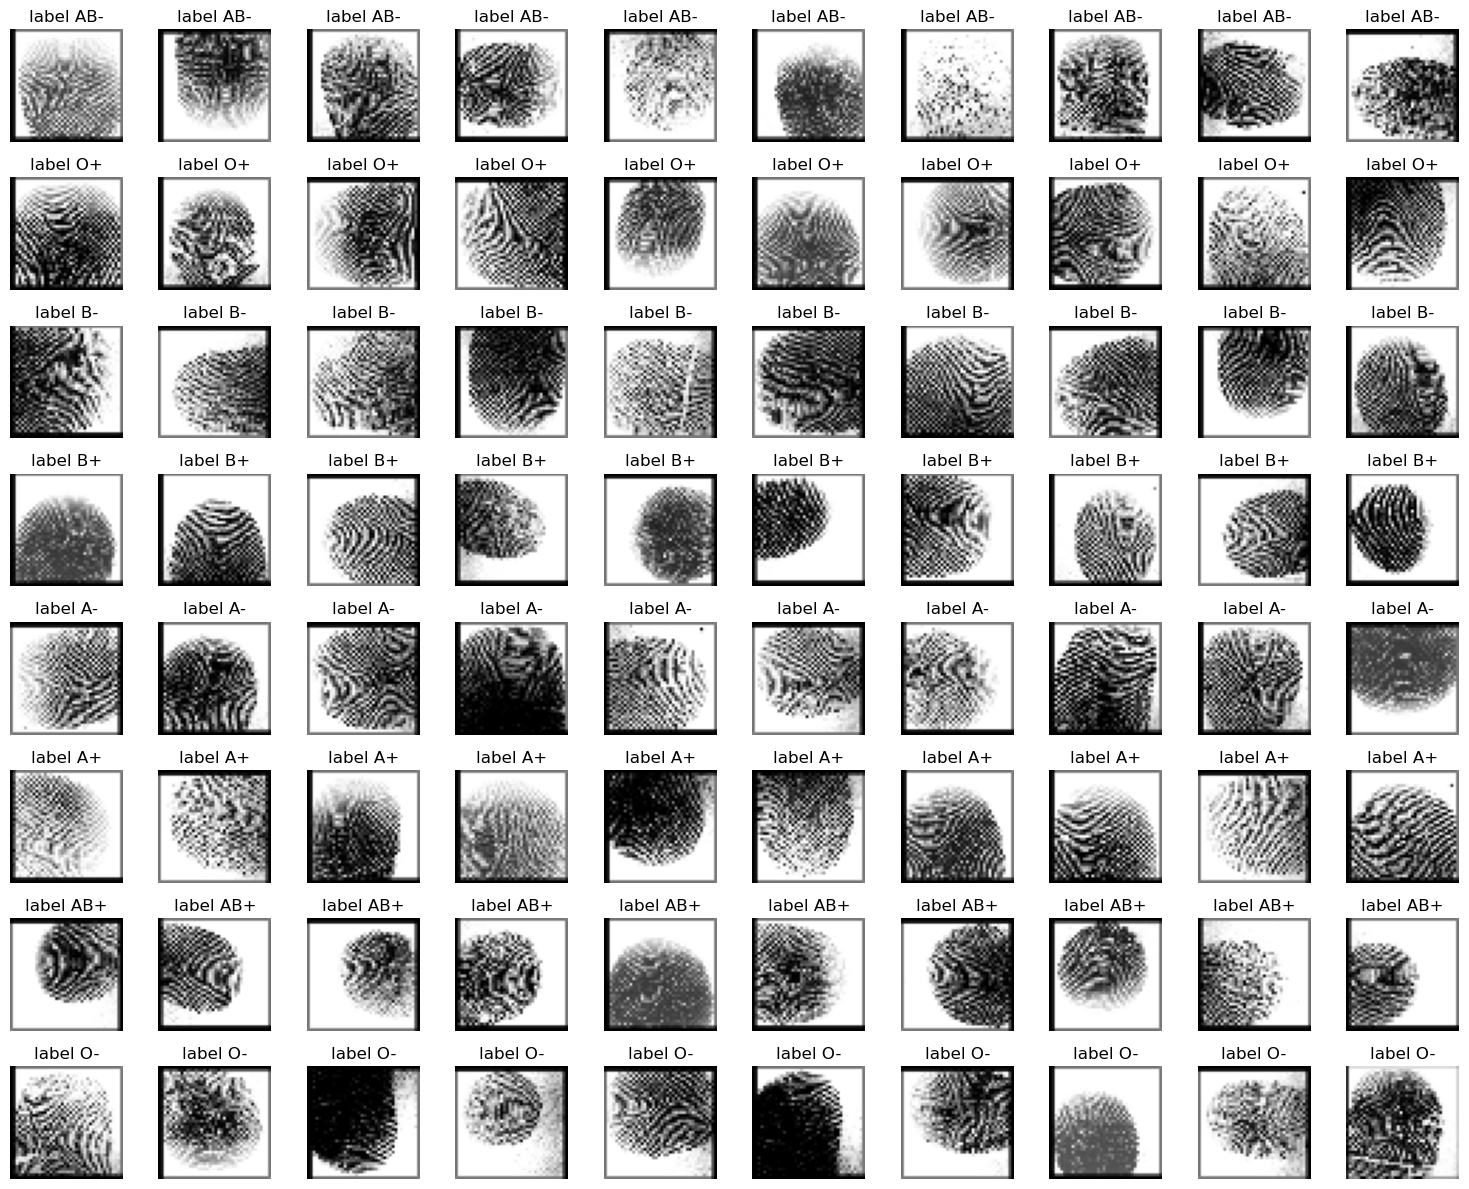

In [97]:
# create the visuals :
total_images = len(images_by_class) * 10 
cols = 10
rows = (total_images // cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
index = 0

for label, images in images_by_class.items():
    for image in images:
        ax = axes.flat[index]
        ax.imshow(image.astype("uint8"))
        ax.axis('off')
        ax.set_title(f"label {ds_train.class_names[label]}")
        index += 1

plt.tight_layout()
plt.show()

### **6. Loading the merge data :**

In [101]:
# Load the data :
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\hp\Downloads\Merge_data', # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42,
    validation_split = 0.2,
    subset = "training"
)

ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\hp\Downloads\Merge_data', # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42,
    validation_split = 0.2,
    subset = "validation"
)

Found 30000 files belonging to 8 classes.
Using 24000 files for training.
Found 30000 files belonging to 8 classes.
Using 6000 files for validation.


In [102]:
# devide the val data set into val and test data set 
val_batches = tf.data.experimental.cardinality(ds_val)
ds_test = ds_val.take(val_batches // 2)
ds_validation = ds_val.skip(val_batches // 2)

In [103]:
# displaying the shapes :
print('the number of batches in train set :', tf.data.experimental.cardinality(ds_train))
print('the number of batches in validation set :', tf.data.experimental.cardinality(ds_validation))
print('the number of batches in test set :', tf.data.experimental.cardinality(ds_test))

the number of batches in train set : tf.Tensor(750, shape=(), dtype=int64)
the number of batches in validation set : tf.Tensor(94, shape=(), dtype=int64)
the number of batches in test set : tf.Tensor(94, shape=(), dtype=int64)


In [104]:
# displaying the range of labeles :
print('the labels are :', ds_train.class_names)

the labels are : ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [105]:
# image visualisation :

# initialization of a dictionary that contient 10 images by class 
images_by_class = {} 

for images, labels in ds_train :
    for image, label in zip(images, labels):
        label = tf.argmax(label).numpy()
        if label not in images_by_class:
            images_by_class[label] = []
        if len(images_by_class[label]) < 10 :
            images_by_class[label].append(image.numpy())

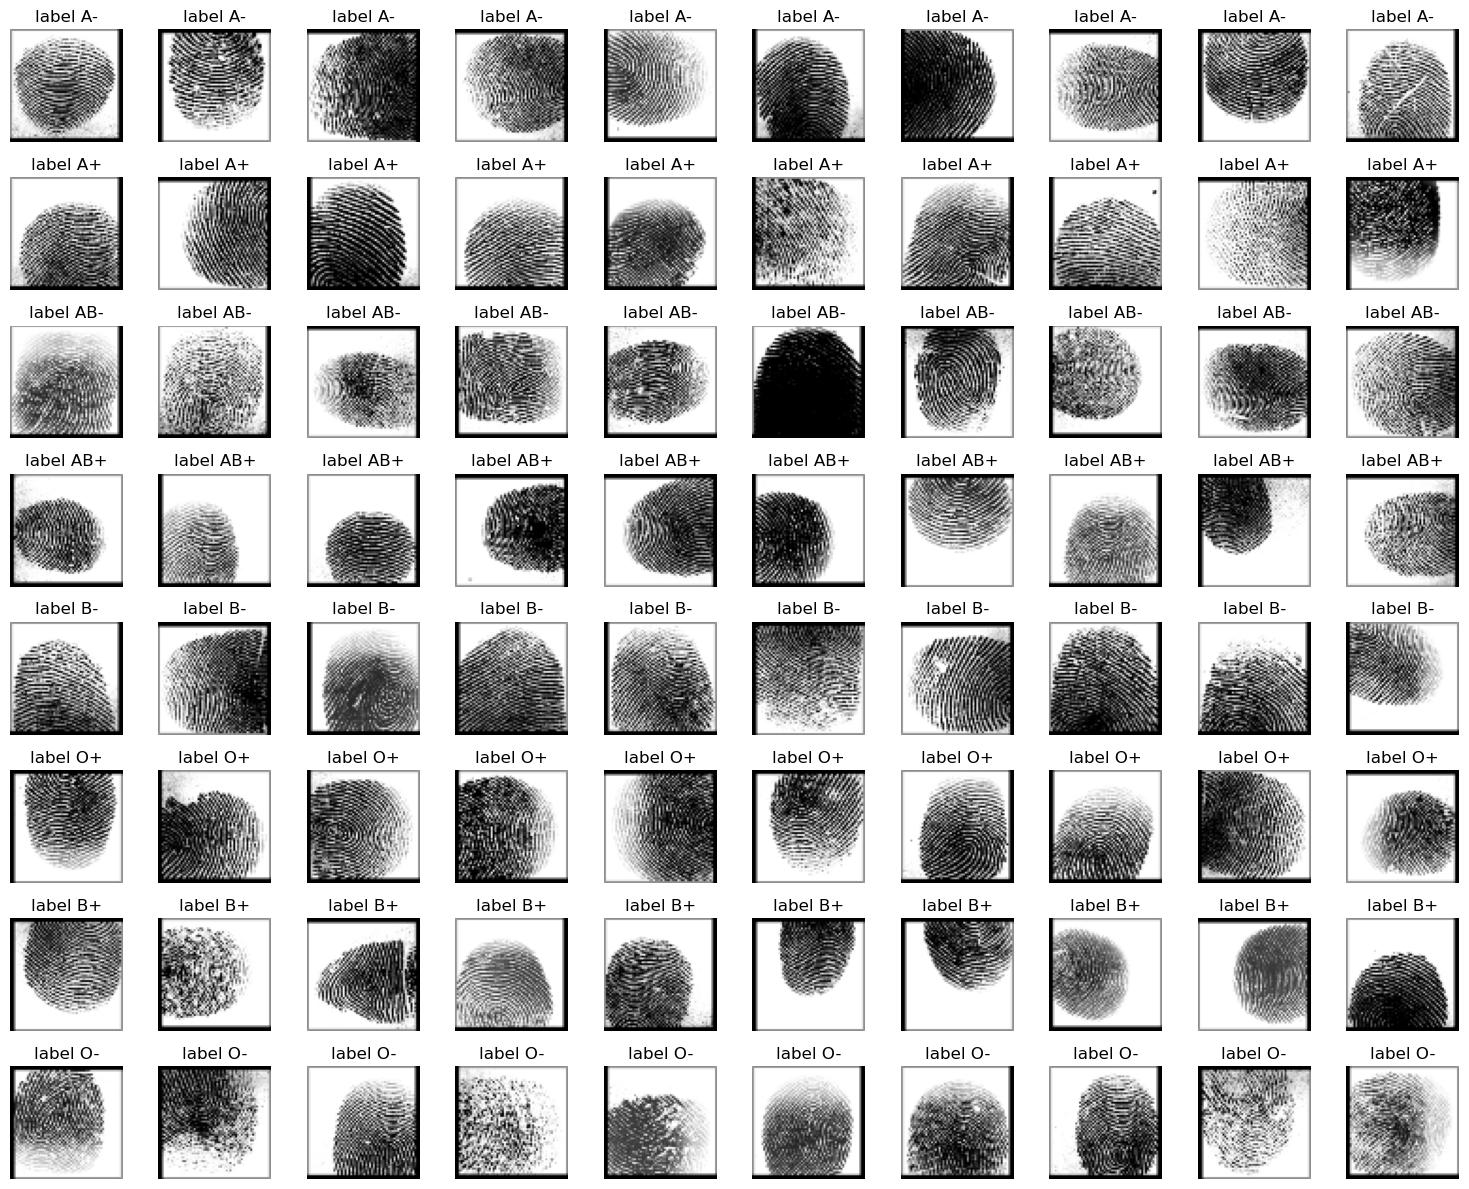

In [106]:
# create the visuals :
total_images = len(images_by_class) * 10 
cols = 10
rows = (total_images // cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
index = 0

for label, images in images_by_class.items():
    for image in images:
        ax = axes.flat[index]
        ax.imshow(image.astype("uint8"))
        ax.axis('off')
        ax.set_title(f"label {ds_train.class_names[label]}")
        index += 1

plt.tight_layout()
plt.show()

In [107]:
# visualize the image matrix :
for img, lab in ds_train.take(1):
    imgi = img[0]
    l = lab[0]
imgi

<tf.Tensor: shape=(60, 60, 3), dtype=float32, numpy=
array([[[  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        ...,
        [  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ]],

       [[  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        ...,
        [  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ]],

       [[  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        [ 95.00004 ,  95.00004 ,  95.00004 ],
        ...,
        [164.66673 , 164.66673 , 164.66673 ],
        [152.23767 , 152.23767 , 152.23767 ],
        [113.60441 , 113.60441 , 113.60441 ]],

       ...,

       [[  0.      ,   0.      ,   0.      ],
        [  0.  

### **7. Data visualization :**

In [109]:
# Load the data :
ds_visualization = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\hp\Downloads\Merge_data', # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42
)

Found 30000 files belonging to 8 classes.


In [118]:
# extract the labels:
labels = []
for _, label in ds_visualization:
    for i in label:
        labels.append(i)

labels = np.array(labels)
print(f"Shape of labels: {labels.shape}")


Shape of labels: (30000, 8)


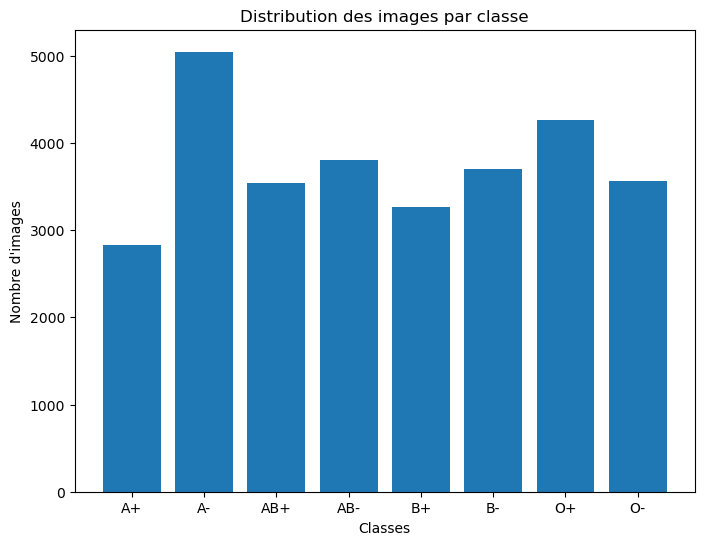

In [121]:
# one hot --> indices
labels_indices = [np.argmax(label) for label in labels]

# compute the number of images in each class
unique, counts = np.unique(labels_indices, return_counts=True)

# define the class names :
class_names = ds_visualization.class_names

# visuaa
plt.figure(figsize=(8, 6))
plt.bar(unique, counts, tick_label=[class_names[i] for i in unique])
plt.xlabel('Classes')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des images par classe')
plt.xticks(unique)  # Pour afficher les classes sur l'axe des x
plt.show()